<b>Excersise 1</b> <i>Project Topics</i>

For my project I want to do the simulation of the Potts model. Since the Potts model is a generalization of the Ising model dealing with charges in lattices specifically representing magenetic dipole moments of atomic spins across the lattice. I will be doing a simulation of this in 2D using q=4.

<b>Exercise 2</b> <i>The diffraction limit of a telescope</i>

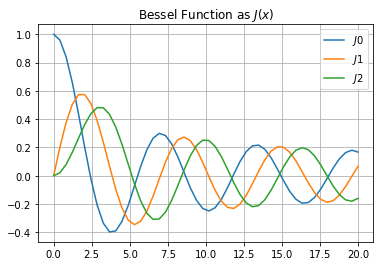

In [1]:
#Kaleb Kautzsch
#Part (i)
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import cos,sin,pi,linspace,sqrt,mgrid

#Defining the Bessel function as a function of theta
def J(m,x):

    def f(theta):
        return cos(m*theta - x*sin(theta))

    N = 1000
    lowerLimit = 0.
    upperLimit = pi
    h = (upperLimit-lowerLimit)/N

    simp = f(lowerLimit) + f(upperLimit) + 4*f(upperLimit-h)
    for k in range(1,N//2):
        simp += 4*f(lowerLimit + (2*k-1)*h) + 2*f(lowerLimit+2*k*h)

    I = h/3*simp/pi

    return I

x = linspace(0,20)
plt.title('Bessel Function as $J(x)$')
plt.grid()
plt.plot(x,J(0,x),label='$J0$')
plt.plot(x,J(1,x),label='$J1$')
plt.plot(x,J(2,x),label='$J2$')
plt.legend()

Text(0.5,1,'Axes going up to 1$\\mu$m')

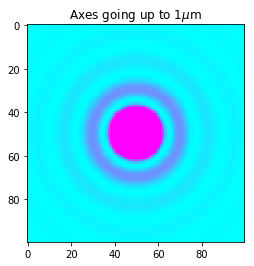

In [2]:
#Kaleb Kautzsch
#Part(ii)
x,y = mgrid[-1:1:100j,-1:1:100j] #defining x and y to fit the plot
r = sqrt(x**2 + y**2)
wavelength = 0.5
k = 2*pi/wavelength

def I(r):
    return (J(1,r*k)/(k*r))**2

plt.imshow(I(r),vmax=0.1/10, cmap='cool')
plt.title('Axes going up to 1$\mu$m')

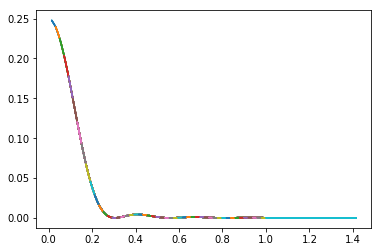

In [3]:
plt.plot(r,I(r)) #showing the intensity as it drops off

<b>Exercise 3</b> <i>The Stefan–Boltzmann constant</i>

Kaleb Kautzsch
Part (i)
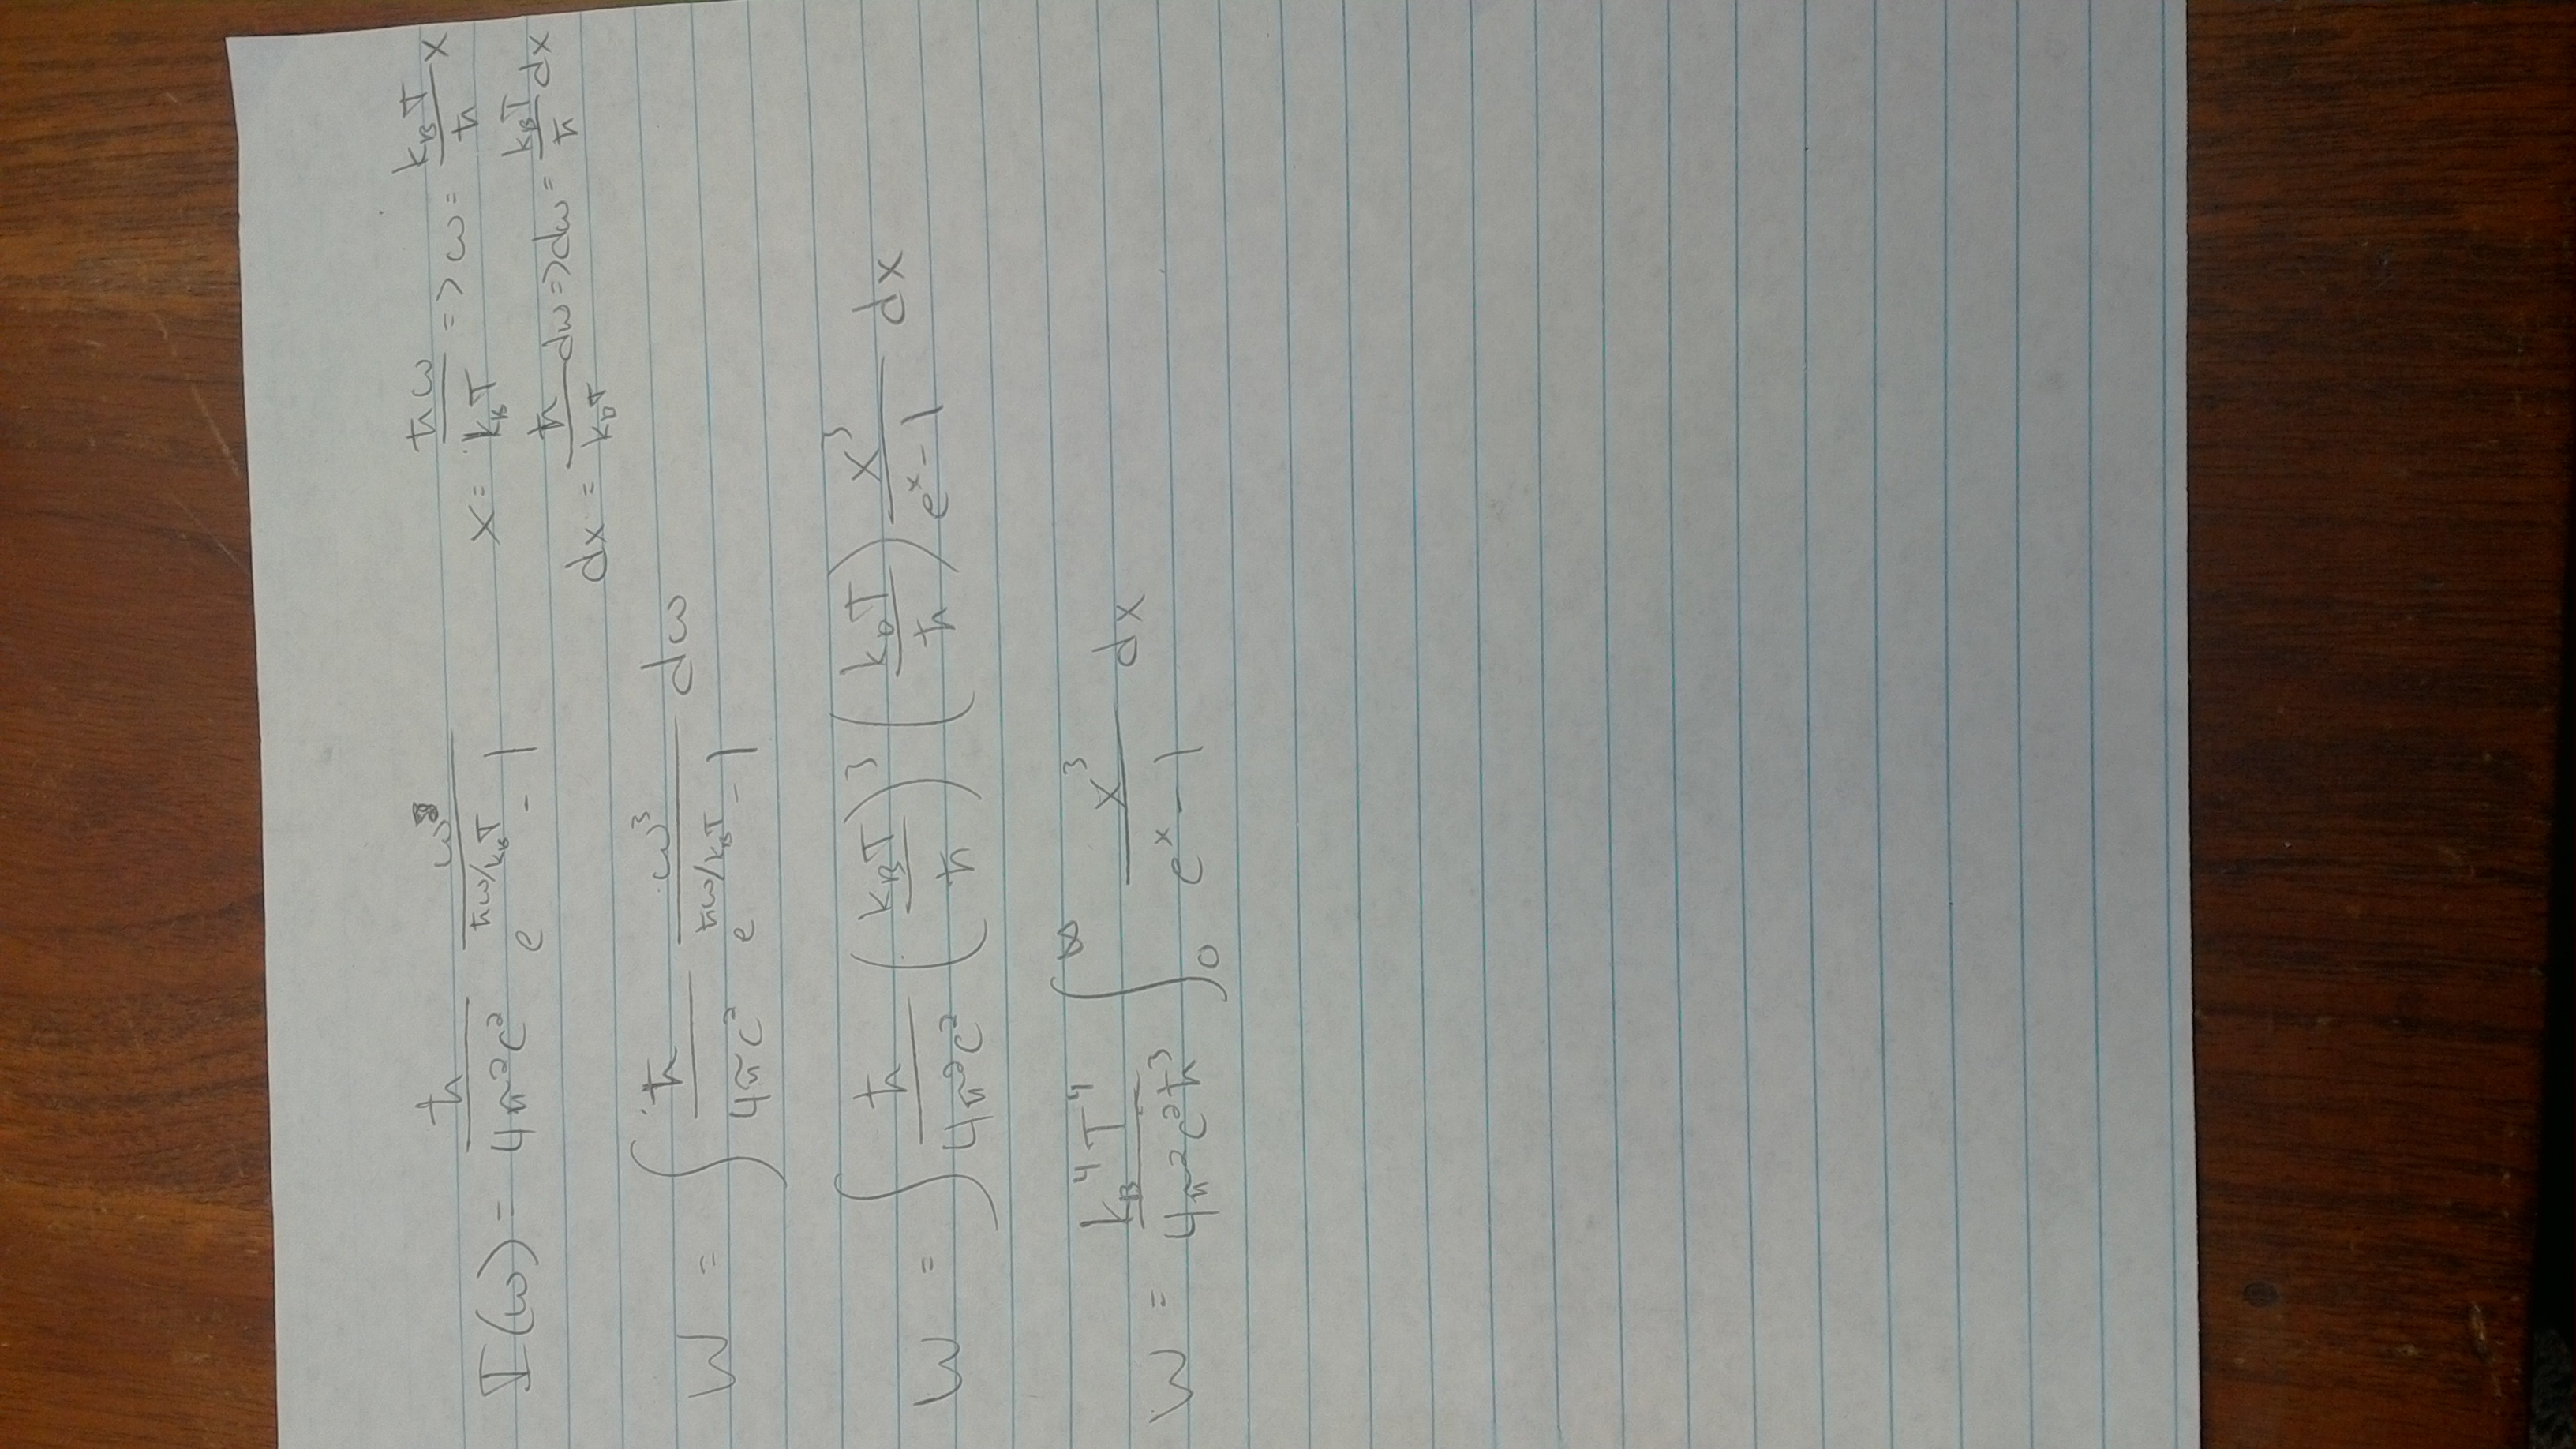

In [7]:
#Kaleb Kautzsch
#Part (ii) and (iii)

from scipy.constants import hbar, c, Boltzmann
from numpy import exp, sqrt, pi, inf
import scipy.integrate as integrate

T = 273
B = Boltzmann
originalF = ((B**4*T**4)/(4*pi**2*c**2*hbar**3))*6.49393940226683 #This is taking the f_original and multiplying by the constants
transformedF = ((B**4*T**4)/(4*pi**2*c**2*hbar**3))*6.493939265515766 #This is taking the f_transformed and doing the same

def f_original(x):
    return x**3/(exp(x)-1)

def f_transformed(x):
    return (x/(1-x))**3/((exp(x/(1-x))-1)*(1-x)**2)

print("Gaussian quadrature: ", integrate.quad(f_transformed, 0, 1))
print("General integration: ", integrate.quad(f_original, 0, inf))
print("Exact value:          ", pi**4/15, "\n")
print("f_original to solve for Stefan-Boltzmann constant: %.3E" % (originalF/T**4), "W*m**-2*K**-4", '\n')
print("f_transformed to solve for Stefan-Boltzmann constant: %.3E" % (transformedF/T**4), "W*m**-2*K**-4", '\n')

Gaussian quadrature:  (6.493939402266829, 6.575158020527812e-10)
General integration:  (6.49393940226683, 2.62847130244751e-09)
Exact value:           6.493939402266828 

f_original to solve for Stefan-Boltzmann constant: 5.670E-08 W*m**-2*K**-4 

f_transformed to solve for Stefan-Boltzmann constant: 5.670E-08 W*m**-2*K**-4 



I used the Gaussian quadrature method because after reading a detailed description of it in the textbook it seemed like the one that would be the most useful in terms of finding a good fit for this integral. As we can see it is accurate up to 14 places in the decimal, and gives the best approximation for when needing to calculate what the value of Stefan-Boltzmann constant is.